In [1]:
# Import Dependencies
from joblib import dump, load
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Naive Bayes Approach
from sklearn.naive_bayes import MultinomialNB
# Trees Approach
from sklearn.tree import DecisionTreeClassifier
# Ensemble Approach
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import seaborn as sn
import matplotlib.pyplot as plt

# Data Preprocessing

### Loading Training data

In [3]:
# reading the dataset
df_train = pd.read_csv("./dataset/training_data.csv")

In [4]:
df_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


In [5]:
cols = df_train.columns
cols = cols[:-2]
train_features = df_train[cols]
train_labels = df_train['prognosis']

In [6]:
train_features

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


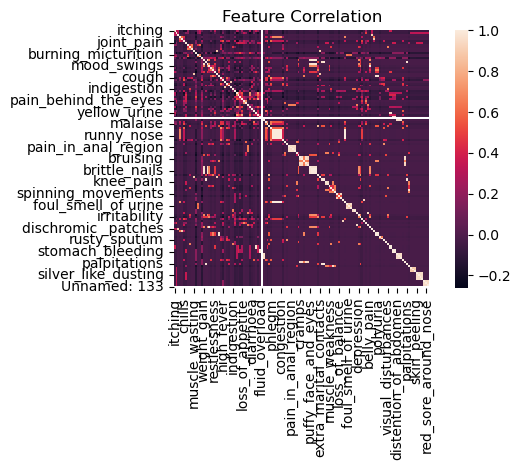

In [7]:
corr = df_train.corr()
sn.heatmap(corr, square=True, annot=False)
plt.title("Feature Correlation")
plt.tight_layout()

plt.show()

### Loading Testing Data


In [8]:
# Reading File
df_test = pd.read_csv("./dataset/test_data.csv")
cols = df_test.columns
cols = cols[:-1]
test_features = df_test[cols]
test_labels = df_test['prognosis']

In [9]:
test_features

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Training


## Decision Tree

In [10]:
# Importing dependencies
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import load_iris


In [11]:
# creating the model
decision_tree_model = DecisionTreeClassifier(criterion="entropy")
# training the model
decision_tree_model = decision_tree_model.fit(train_features, train_labels)

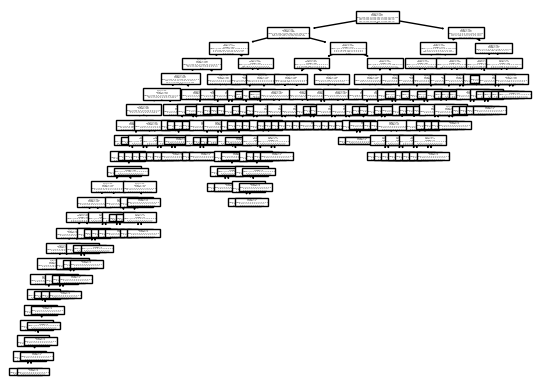

In [12]:
# plotting the decision tree
tree.plot_tree(decision_tree_model);

In [13]:
y_pred = decision_tree_model.predict(test_features)
# Model Validation Accuracy
accuracy = accuracy_score(test_labels, y_pred)
# Model Confusion Matrix
conf_mat = confusion_matrix(test_labels, y_pred)
# Model Classification Report
# Model Cross Validation Score

In [14]:
accuracy

0.9285714285714286

In [15]:
conf_mat

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [16]:
dump(decision_tree_model, str("decision_tree_model.joblib"))

['decision_tree_model.joblib']

In [ ]:
## Random Forest

from sklearn.ensemble import RandomForestClassifier

# creating the model
random_forest_model = RandomForestClassifier()
# training the model
random_forest_model = decision_tree_model.fit(train_features, train_labels)


y_pred = random_forest_model.predict(test_features)
# Model Validation Accuracy
accuracy = accuracy_score(test_labels, y_pred)
# Model Confusion Matrix
conf_mat = confusion_matrix(test_labels, y_pred)
# Model Classification Report
# clf_report = classification_report(test_labels, y_pred)
# Model Cross Validation Score

accuracy

conf_mat

# saving the model
dump(random_forest_model, str("random_forest_model.joblib"))

## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier


In [18]:
# creating the model
random_forest_model = RandomForestClassifier()
# training the model
random_forest_model = decision_tree_model.fit(train_features, train_labels)


In [19]:
y_pred = random_forest_model.predict(test_features)
# Model Validation Accuracy
accuracy = accuracy_score(test_labels, y_pred)
# Model Confusion Matrix
conf_mat = confusion_matrix(test_labels, y_pred)
# Model Classification Report
# clf_report = classification_report(test_labels, y_pred)
# Model Cross Validation Score


In [20]:
accuracy

0.9285714285714286

In [21]:
conf_mat


array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [22]:
# saving the model
dump(random_forest_model, str("random_forest_model.joblib"))

['random_forest_model.joblib']

## Naive Bayes

In [23]:
from sklearn.naive_bayes import MultinomialNB

In [24]:
# creating the model
naive_bayes_model = MultinomialNB()
# training the model
naive_bayes_model = naive_bayes_model.fit(train_features, train_labels)


In [25]:
y_pred = naive_bayes_model.predict(test_features)
# Model Validation Accuracy
accuracy = accuracy_score(test_labels, y_pred)
# Model Confusion Matrix
conf_mat = confusion_matrix(test_labels, y_pred)
# Model Classification Report
# clf_report = classification_report(test_labels, y_pred)
# Model Cross Validation Score
